In [1]:
import os
import gc
import re
import json
import pickle
import datetime
from tqdm import tqdm

import numpy as np
import pandas as pd
pd.options.display.max_columns = None

from typing import Union

import seaborn
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')
%config InlineBackend.figure_formats = {'png', 'retina'}

from scipy.stats import linregress

from sklearn import preprocessing
from sklearn.model_selection import TimeSeriesSplit
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_squared_log_error

import lightgbm as lgb

from v01005_Baseline import *

In [2]:
VERSION = 'v01005'
SEED = 42

In [3]:
train = pd.read_pickle('/Users/rui/Documents/repositories/m5_forecasting_accuracy/v01000/features/add_sales_train.pkl')

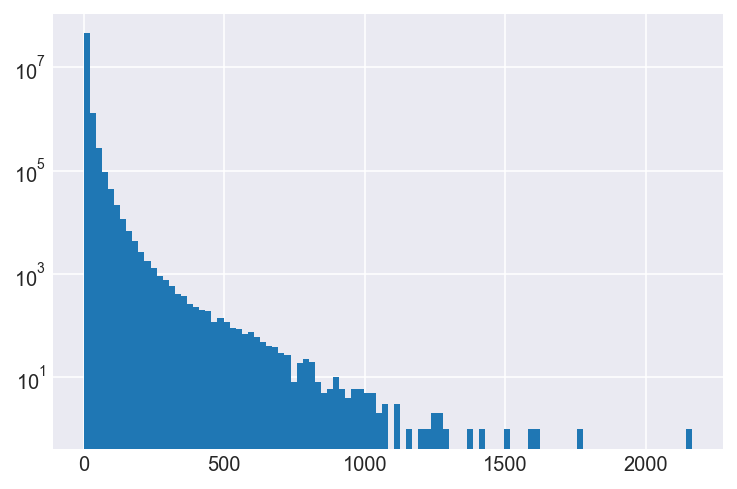

In [7]:
(train['sales'] * train['sell_price']).hist(bins=100, log=True)

In [4]:
train.head()

,id,item_id,dept_id,cat_id,store_id,state_id,d,sales,date,wm_yr_wk,month,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,snap_TX,snap_WI,quarter,weekofyear,day,dayofweek,is_quarter_end,is_quarter_start,is_month_end,is_month_start,is_weekend,sell_price,sell_price_rate_by_wm_yr_wk__item_id,sell_price_rate_by_wm_yr_wk__area__item_id,sell_price_momentum,sales_lag_t28,sales_lag_t29,sales_lag_t30,sales_lag_t32,sales_lag_t33,sales_lag_t34,sales_rolling_STD_t7,sales_rolling_STD_t30,sales_rolling_STD_t60,sales_rolling_STD_t90,sales_rolling_STD_t180,sales_rolling_MEAN_t7,sales_rolling_MEAN_t30,sales_rolling_MEAN_t60,sales_rolling_MEAN_t90,sales_rolling_MEAN_t180,sales_rolling_MIN_t7,sales_rolling_MIN_t30,sales_rolling_MIN_t60,sales_rolling_MAX_t7,sales_rolling_MAX_t30,sales_rolling_MAX_t60,sales_rolling_ZeroRatio_t7,sales_rolling_ZeroCount_t7,sales_rolling_ZeroRatio_t14,sales_rolling_ZeroCount_t14,sales_rolling_ZeroRatio_t30,sales_rolling_ZeroCount_t30,sales_rolling_ZeroRatio_t60,sales_rolling_ZeroCount_t60,sales_rolling_SKEW_t30,sales_rolling_KURT_t30
213437,HOBBIES_1_008_CA_1_validation,1444,3,1,0,0,d_8,5,2011-02-05,11102,2,19,2,3,1,1,1,1,1,5,5,5,0,0,0,0,1,0.459961,0.983887,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213438,HOBBIES_1_009_CA_1_validation,1445,3,1,0,0,d_8,9,2011-02-05,11102,2,19,2,3,1,1,1,1,1,5,5,5,0,0,0,0,1,1.559570,0.993652,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213439,HOBBIES_1_010_CA_1_validation,1446,3,1,0,0,d_8,0,2011-02-05,11102,2,19,2,3,1,1,1,1,1,5,5,5,0,0,0,0,1,3.169922,1.000000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213441,HOBBIES_1_012_CA_1_validation,1448,3,1,0,0,d_8,2,2011-02-05,11102,2,19,2,3,1,1,1,1,1,5,5,5,0,0,0,0,1,5.980469,0.985352,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
213444,HOBBIES_1_015_CA_1_validation,1451,3,1,0,0,d_8,0,2011-02-05,11102,2,19,2,3,1,1,1,1,1,5,5,5,0,0,0,0,1,0.700195,1.000000,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
